In [80]:
# MNIST DNN using Tensorflow
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf

# Note that keras and tf.keras are different
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

print(tf.__version__)

1.14.0


In [81]:
# Load MNIST dataset
digits = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digits.load_data()

print('Shape = ', train_images.shape)  #MNIST image size = 28*28
print('Train set length = ',len(train_images))
print('Test set length = ',len(test_images))

Shape =  (60000, 28, 28)
Train set length =  60000
Test set length =  10000


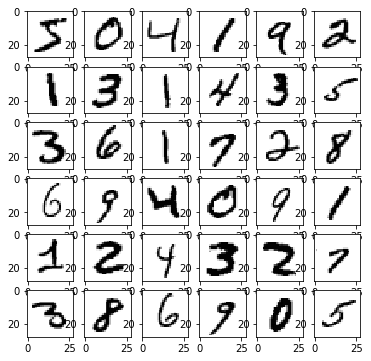

In [82]:
# Preprocessing
# 0~255 scale to 0~1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Show images
plt.figure(figsize=(6,6))
for i in range(36):
    plt.grid(False)
    plt.subplot(6,6,i+1)
    plt.imshow(train_images[i], cmap=cm.gray_r, interpolation='nearest')
plt.show()

In [83]:
# Design model (DNN)
#'''
# 2-layer DNN
model = Sequential([
    Flatten(input_shape=(28, 28)),       # input layer = 28*28 = 784
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)  # output softmax layer
])
#'''
'''
# 6-layer DNN
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),       # input layer = 28*28 = 784
    Dense(2500, activation=tf.nn.relu),
    Dense(2000, activation=tf.nn.relu),
    Dense(1500, activation=tf.nn.relu),
    Dense(1000, activation=tf.nn.relu),
    Dense(500, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)  # output softmax layer
])
'''

'\n# 6-layer DNN\nmodel = keras.Sequential([\n    Flatten(input_shape=(28, 28)),       # input layer = 28*28 = 784\n    Dense(2500, activation=tf.nn.relu),\n    Dense(2000, activation=tf.nn.relu),\n    Dense(1500, activation=tf.nn.relu),\n    Dense(1000, activation=tf.nn.relu),\n    Dense(500, activation=tf.nn.relu),\n    Dense(10, activation=tf.nn.softmax)  # output softmax layer\n])\n'

In [0]:
# Compile model
#'''
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#'''
'''
sgd = tf.keras.optimizers.SGD(lr=0.1, decay=0.00022, momentum=0.5)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''

In [95]:
# Train model
model.fit(train_images, train_labels, epochs=5)

# Accuracy check with test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print('Accuracy = ', test_accuracy)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0097 - acc: 0.9985
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0073 - acc: 0.9991
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0059 - acc: 0.9996
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0052 - acc: 0.9996
Epoch 5/5
10000/10000 [==============================] - 0s 45us/sample - loss: 0.0669 - acc: 0.9816
Accuracy =  0.9816


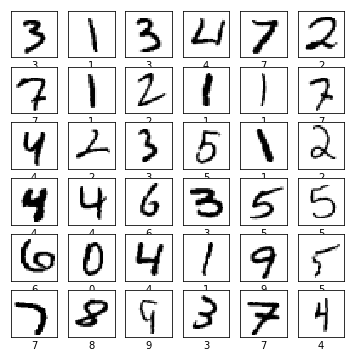

In [0]:
# Prediction
predictions = model.predict(test_images)

offset = 30
plt.figure(figsize=(6,6))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[offset+i], cmap=cm.gray_r, interpolation='nearest')
    predicted = np.argmax(predictions[offset+i])
    
    color = 'black'
    if test_labels[offset+i] != predicted:
        color = 'red'
    plt.xlabel(predicted, color=color)
plt.show()